# **Immobilier Paris**

---

### **1) Importation données :**
Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.  
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [1]:
# Librairies opérationnelles
import numpy as np
import pandas as pd
# Librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des données
df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")
df_transactions.head()

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.872300,2018-01-02
1,2018-1384130,110000.0,12,9166,1,appartement,Paris 14e Arrondissement,Montparnasse 4,75114,75,751145304,75114000AM0068,2.326280,48.835690,2018-01-02
2,2018-1376276,87950.0,9,9772,1,appartement,Paris 11e Arrondissement,Roquette 2,75111,75,751114302,75111000BS0234,2.386354,48.856080,2018-01-02
3,2018-1382007,699000.0,111,6297,6,appartement,Paris 13e Arrondissement,Maison Blanche 18,75113,75,751135118,75113000EI0007,2.343125,48.829746,2018-01-02
4,2018-1376139,251000.0,29,8655,2,appartement,Paris 12e Arrondissement,Picpus 5,75112,75,751124605,75112000BS0026,2.396901,48.834740,2018-01-02


### **2) Nettoyage et Filtrage :**
Nettoyer le jeu de données pour qu'il puisse être utilisé pour conseiller les ménages de classe moyenne en recherche de logement.

In [2]:
# Avoir un aperçu général 
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53185 entries, 0 to 53184
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                53185 non-null  object 
 1   valeur_fonciere            53185 non-null  float64
 2   surface_reelle_bati        53185 non-null  int64  
 3   prix_m2                    53185 non-null  int64  
 4   nombre_pieces_principales  53185 non-null  int64  
 5   type_local                 53185 non-null  object 
 6   nom_commune                53185 non-null  object 
 7   nom_iris                   53185 non-null  object 
 8   code_commune               53185 non-null  int64  
 9   code_departement           53185 non-null  int64  
 10  code_iris                  53185 non-null  int64  
 11  id_parcelles               53185 non-null  object 
 12  longitude                  53185 non-null  float64
 13  latitude                   53185 non-null  flo

In [3]:
# vérifier les valeurs manquantes dans le dataset 
df_transactions.isna().sum() # pas de nulls dans le dataset

id_mutation                  0
valeur_fonciere              0
surface_reelle_bati          0
prix_m2                      0
nombre_pieces_principales    0
type_local                   0
nom_commune                  0
nom_iris                     0
code_commune                 0
code_departement             0
code_iris                    0
id_parcelles                 0
longitude                    0
latitude                     0
date_mutation                0
dtype: int64

In [4]:
# voir s'il y a des doublons : 
df_transactions.duplicated().sum() # pas de doublons dans le dataset

0

In [5]:
# Convertir date_mutation en datetime
df_transactions['date_mutation'] = pd.to_datetime(df_transactions['date_mutation'])

In [6]:
# Voir quelques statistiques sur les colonnes numériques: 
df_transactions[['valeur_fonciere',	'surface_reelle_bati', 	'prix_m2',	'nombre_pieces_principales']].describe().round(4)

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales
count,5.318500e+04,53185.0000,53185.0000,53185.0000
mean,5.364078e+05,53.9051,9924.7908,2.0817
std,1.321097e+06,120.0370,2899.6111,1.3029
min,1.000000e+04,1.0000,2000.0000,0.0000
25%,2.400000e+05,26.0000,8228.0000,1.0000
50%,3.741000e+05,40.0000,9736.0000,2.0000
75%,6.000000e+05,61.0000,11363.0000,3.0000
max,1.956000e+08,11887.0000,30000.0000,23.0000


In [7]:
df_transactions['type_local'].value_counts(normalize=True) * 100 # pourcentage de chaque type de local

type_local
appartement         91.982702
local industriel     7.579205
maison               0.438093
Name: proportion, dtype: float64

In [16]:
# On exclue les locaux industriels qui n'intéressent pas les ménages 
df_transactions = df_transactions[df_transactions['type_local'] != 'local industriel']
df_transactions['type_local'].value_counts()

type_local
appartement    48921
maison           233
Name: count, dtype: int64

Text(0, 0.5, 'Fréquence')

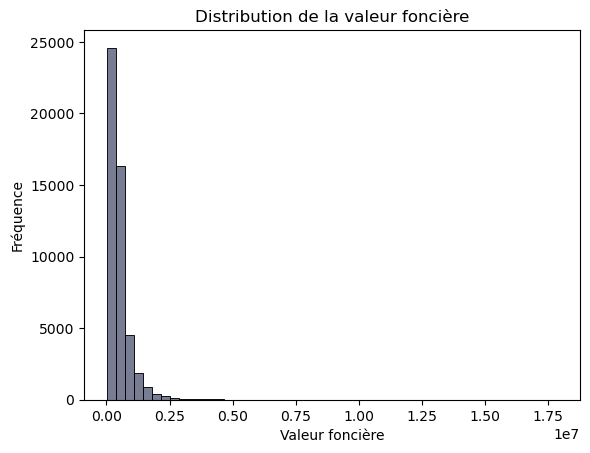

In [17]:
# distribution de la valeur foncière  
sns.histplot(data=df_transactions['valeur_fonciere'], bins=50, color='#4c5270')
plt.title("Distribution de la valeur foncière")
plt.xlabel("Valeur foncière")
plt.ylabel("Fréquence")

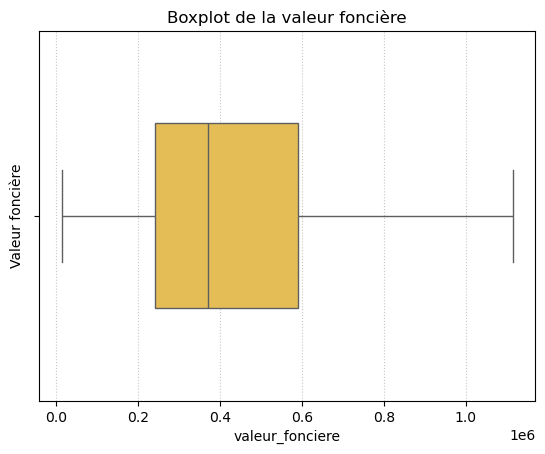

In [18]:
# la distribution a une forte asymétrie à droite, on peut utiliser un boxplot pour mieux visualiser les valeurs extrêmes
# On supprime les valeurs extrêmes pour une meilleure visualisation. 
sns.boxplot(x=df_transactions['valeur_fonciere'], showfliers=False, width=0.5, color='#fbc740')
plt.ylabel("Valeur foncière")
plt.grid(axis='x', linestyle='dotted', alpha=0.7)
plt.title("Boxplot de la valeur foncière")
plt.show()

In [19]:
# calculons les valeurs extrêmes
q1 = df_transactions['valeur_fonciere'].quantile(0.25)
q3 = df_transactions['valeur_fonciere'].quantile(0.75)
iqr = q3 - q1
# Définir les bornes pour les valeurs extrêmes
upper_bound = q3 + 1.5 * iqr 
print(f"Au delà de : {upper_bound}, sont des valeurs extrêmes") 

Au delà de : 1115000.0, sont des valeurs extrêmes


In [20]:
# pour un ménage de classe moyenne, on peut considérer la valeur foncière au dessous du q3 comme une valeur raisonnable. 
df_transactions = df_transactions[df_transactions['valeur_fonciere'] <= q3]
df_transactions['valeur_fonciere'].describe().round(2)

count     36909.00
mean     312654.82
std      131494.93
min       13225.00
25%      210000.00
50%      300000.00
75%      411000.00
max      590000.00
Name: valeur_fonciere, dtype: float64

In [21]:
# Pour filtrer en bas, nous utiliserons le nombre de pièces principales, qui est un indicateur de la taille du logement.
# On peut considérer qu'un logement de 2 pièces est le minimum pour un ménage.
df_transactions['nombre_pieces_principales'].describe().round(2)

count    36909.00
mean         1.81
std          0.78
min          0.00
25%          1.00
50%          2.00
75%          2.00
max         20.00
Name: nombre_pieces_principales, dtype: float64

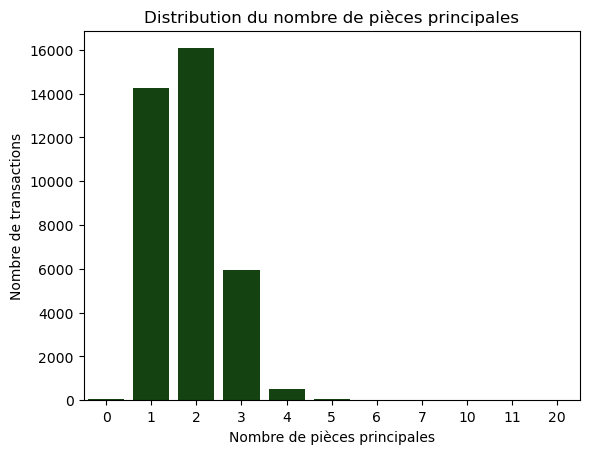

In [22]:
# Visualisons la distribution du nombre de pièces principales
counts = df_transactions['nombre_pieces_principales'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, color="#0d4a08")
plt.xlabel("Nombre de pièces principales")
plt.ylabel("Nombre de transactions")
plt.title("Distribution du nombre de pièces principales")
plt.show()

In [23]:
# On filtre les appartements avec au moins 2 pièces principales
df_transactions = df_transactions[df_transactions['nombre_pieces_principales'] >= 2]

Text(0, 0.5, 'Fréquence')

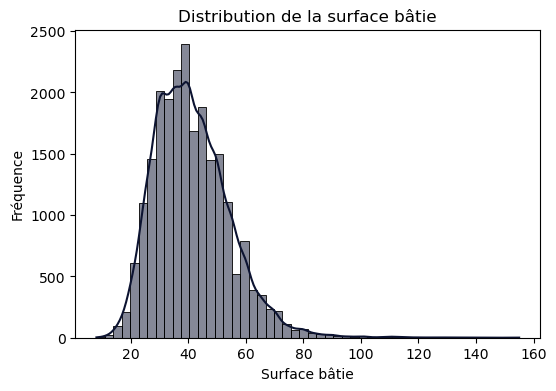

In [24]:
# Maitenant, on peut visualiser la surface réelle bâtie 
# Histogramme de la surface bâtie
plt.figure(figsize=(6, 4))
sns.histplot(df_transactions['surface_reelle_bati'], bins=50, kde=True, color="#0c1331")
plt.title("Distribution de la surface bâtie")
plt.xlabel("Surface bâtie")
plt.ylabel("Fréquence")

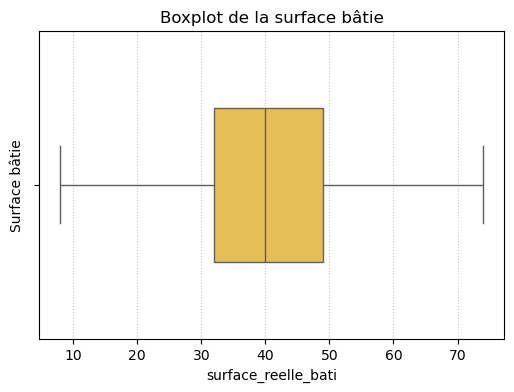

In [25]:
# Boxplot de la surface bâtie
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_transactions['surface_reelle_bati'], showfliers=False, width=0.5, color='#fbc740')
plt.ylabel("Surface bâtie")
plt.grid(axis='x', linestyle='dotted', alpha=0.7)
plt.title("Boxplot de la surface bâtie")
plt.show()


In [16]:
df_transactions['surface_reelle_bati'].describe().round(2)

count    22585.00
mean        41.29
std         13.19
min          8.00
25%         32.00
50%         40.00
75%         49.00
max        155.00
Name: surface_reelle_bati, dtype: float64

In [28]:
# Filtrer les appartements avec une surface bâtie raisonnable
q1 = df_transactions['surface_reelle_bati'].quantile(0.25)
q3 = df_transactions['surface_reelle_bati'].quantile(0.75)
iqr = q3 - q1
# Définir les bornes pour les valeurs extrêmes
upper_bound = q3 + 1.5 * iqr
print(f"Au delà de {upper_bound} m2, est une surface extrême et au dessous de {q1} m2 ne convient pas à un ménage de classe moyenne")

Au delà de 74.5 m2, est une surface extrême et au dessous de 32.0 m2 ne convient pas à un ménage de classe moyenne


In [29]:
# filtrage de la surface bâtie
df_transactions = df_transactions[(df_transactions['surface_reelle_bati'] > q1) & (df_transactions['surface_reelle_bati'] < upper_bound)]

In [31]:
print(df_transactions.shape)
# On a 15930 appartements à proposer à notre ménage de classe moyenne
df_transactions.head()

(15930, 15)


,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
7,2018-1391111,397500.0,48,8281,2,appartement,Paris 16e Arrondissement,Auteuil 16,75116,75,751166116,75116000AI0059,2.267243,48.843130,2018-01-02
12,2018-1386367,400000.0,40,10000,2,appartement,Paris 15e Arrondissement,Necker 17,75115,75,751155817,75115000CR0082,2.320926,48.844204,2018-01-03
17,2018-1403977,312450.0,33,9468,2,appartement,Paris 20e Arrondissement,Belleville 5,75120,75,751207705,75120000AO0003,2.386159,48.869200,2018-01-03
19,2018-1404084,524000.0,55,9527,3,appartement,Paris 20e Arrondissement,Charonne 12,75120,75,751208012,75120000DN0024,2.405946,48.854214,2018-01-03
25,2018-1372237,355000.0,52,6826,3,appartement,Paris 9e Arrondissement,Saint-Georges 6,75109,75,751093306,75109000AA0044,2.330953,48.882910,2018-01-03


In [32]:
# On peut classer les arrondissements de Paris par la moyenne de la valeur foncière:  
df_transactions.groupby('nom_commune')['valeur_fonciere'].mean().round(2).sort_values(ascending=False)

nom_commune
Paris 6e Arrondissement     466549.13
Paris 4e Arrondissement     464993.52
Paris 7e Arrondissement     456796.87
Paris 8e Arrondissement     452986.05
Paris 3e Arrondissement     451831.21
Paris 16e Arrondissement    449932.34
Paris 2e Arrondissement     449767.68
Paris 1er Arrondissement    446985.97
Paris 5e Arrondissement     444675.84
Paris 9e Arrondissement     442406.05
Paris 17e Arrondissement    428649.06
Paris 15e Arrondissement    427047.21
Paris 10e Arrondissement    420043.91
Paris 11e Arrondissement    414657.13
Paris 14e Arrondissement    413601.01
Paris 12e Arrondissement    399972.15
Paris 13e Arrondissement    394700.33
Paris 18e Arrondissement    386865.57
Paris 20e Arrondissement    383045.77
Paris 19e Arrondissement    376621.27
Name: valeur_fonciere, dtype: float64

### **3) Filtrage supplémentaire :**

Un couple vient vivre à Paris et aimerait acheter un logement.  Ils ne connaissent absolument pas la ville de Paris, mais ont quelques critères et préférences, que voici ci-dessous.
- Budget Max : 450 000 euros
- Idéalement, nature à proximité
- Environnement assez calme

Faire une recommandation au couple, en vous basant sur l'historique de transactions du dataset. Votre recommandation permettra au couple d'avoir une idée assez précise du lieu qui pourrait à la fois leur convenir et rentrer dans leur budget.

#### **3.1) Filtrer la valeur foncière :**

In [ ]:
# On garde notre df_transactions pour notre couple. 
# On commence par filtrer les transactions pour ne garder que celles au dessous de 450 000 euros. 
couple = df_transactions[(df_transactions['valeur_fonciere'] <= 450000)]
couple.shape # on a 10055 appartements à proposer à notre couple. 

(10055, 15)

#### **3.2) Proximité nature :**

In [ ]:
# # espaces verts à proximité : 
# On peut chercher des mots clés dans la colonne 'nom iris' pour identifier les quartiers avec bois, parcs ou jardins. 
couple['nom_iris'] 
couple['nature']= couple['nom_iris'].apply(lambda x: 1 if 'jardin' in x.lower() 
                                           or 'parc' in x.lower() 
                                           or 'bois' in x.lower() 
                                           or 'espace vert' in x.lower()
                                           or 'muette' in x.lower() # Proximité du bois de Boulogne
                                           or 'dauphine' in x.lower() # Proximité du bois de Boulogne
                                           or 'Auteuil' in x.lower() # Proximité du bois de Boulogne
                                           or 'charenton' in x.lower() # Proximité du bois de Vincennes
                                           else 0)
couple_nature = couple[couple['nature'] == 1] # On filtre les lignes qui contiennent jardin, parc ou bois dans le nom_iris
couple_nature.groupby('nom_iris').size().sort_values(ascending=False)


C:\Users\barba\AppData\Local\Temp\ipykernel_13928\1296110143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  couple['nature']= couple['nom_iris'].apply(lambda x: 1 if 'jardin' in x.lower()


(241, 16)

#### **3.3) Quartier calme :**

In [ ]:
# SOURCE VILLE DE PARIS OPEN DATA: 
# [Recommandations OMS (2018) : Lden < 53  dB(A), Ln< 45 dB (A)] 
import regex as re
bruit = pd.read_csv('bruit_stations_parisiennes.csv', sep=';')
bruit.head()
# On selectionne 2019 
bruit_2019 = bruit[bruit['Année'] == 2019]
bruit_2019= pd.DataFrame(bruit_2019.head().T.reset_index())
bruit_2019.columns =['station', 'indice_2019']
bruit_2019.drop(bruit_2019.index[0], inplace=True) # On supprime la première ligne

# On peut extraire tous les caractères qui commencent avec un Ln ou Ld en utilisant Regex:
bruit_2019['noise_type'] = bruit_2019['station'].str.extract(r'(Lden dB\(A\)|Ln dB\(A\))', expand=False)
bruit_2019['station_name'] = bruit_2019['station'].str.split(' - L').str[0]
bruit_2019= bruit_2019[['station_name', 'noise_type', 'indice_2019']]
bruit_2019.dropna(inplace=True) # On supprime les lignes avec des valeurs manquantes

quartier_a_eviter= bruit_2019[
    ((bruit_2019['noise_type'] == 'Lden dB(A)') & (bruit_2019['indice_2019'] > 53)) |
    ((bruit_2019['noise_type'] == 'Ln dB(A)') & (bruit_2019['indice_2019'] > 45)) ]

quartier_a_eviter.drop_duplicates(subset=['station_name'], inplace=True) # je supprime les doublons
quartier_a_eviter['station_name'] = quartier_a_eviter['station_name'].str.replace(r'\(.*?\)', '', regex=True) # On supprime les parenthèses et leur contenu
quartier_a_eviter

,station_name,noise_type,indice_2019
1,Périphérique Auteuil,Lden dB(A),85.8
3,Périphérique Vincennes,Lden dB(A),84.5
5,88 rue de Courcelles,Lden dB(A),73.1
6,88 rue de Courcelles,Ln dB(A),65.3
7,62 rue de Courcelles,Lden dB(A),72.3
9,74 rue Pierre Soulié,Lden dB(A),78.9
13,102 boulevard de Sébastopol,Lden dB(A),78.0
16,21 quai Anatole France,Ln dB(A),74.5
17,88 rue de Rivoli,Lden dB(A),76.0
23,4 place St Michel,Lden dB(A),74.5


In [ ]:
# On utlise l'API de Géoportail pour obtenir les coordonnées géographiques des stations de bruit à éviter
import requests
def get_coordinates(address):
    api_url = 'https://api-adresse.data.gouv.fr/search/?q='
    link = api_url + address.replace(' ', '+')
    r = requests.get(link).json()
    # Check if 'features' exists and is not empty
    if 'features' in r and len(r['features']) > 0:
        return r['features'][0]['geometry']['coordinates'][::-1]
    else:
        return [None, None]

quartier_a_eviter['coordinates'] = quartier_a_eviter['station_name'].apply(get_coordinates)
quartier_a_eviter 

,station_name,noise_type,indice_2019,coordinates
1,Périphérique Auteuil,Lden dB(A),85.8,"[42.004283, 8.919546]"
3,Périphérique Vincennes,Lden dB(A),84.5,"[42.004283, 8.919546]"
5,88 rue de Courcelles,Lden dB(A),73.1,"[49.263887, 4.014373]"
6,88 rue de Courcelles,Ln dB(A),65.3,"[49.263887, 4.014373]"
7,62 rue de Courcelles,Lden dB(A),72.3,"[49.26281, 4.016689]"
9,74 rue Pierre Soulié,Lden dB(A),78.9,"[48.8726, 2.413366]"
13,102 boulevard de Sébastopol,Lden dB(A),78.0,"[48.867881, 2.353684]"
16,21 quai Anatole France,Ln dB(A),74.5,"[48.861598, 2.32225]"
17,88 rue de Rivoli,Lden dB(A),76.0,"[48.858254, 2.349388]"
23,4 place St Michel,Lden dB(A),74.5,"[43.855644, 5.590942]"


In [ ]:
# affichons les appartements sur une carte folium: 
# affichons également les quartiers à éviter en rouge
import folium
# Centrer la carte sur la moyenne des coordonnées des appartements sélectionnés
center_lat = couple_nature['latitude'].mean()
center_lon = couple_nature['longitude'].mean()
map = folium.Map(location=[center_lat, center_lon], zoom_start=12)
for index, row in couple_nature.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['nom_iris']).add_to(map)
for index, row in quartier_a_eviter.iterrows():
    if row['coordinates'][0] is not None and row['coordinates'][1] is not None:
        folium.Marker(location=row['coordinates'], popup=row['station_name'], icon=folium.Icon(color='red')).add_to(map)
map